Ce script sert à la création de variables globales à partir des variables des fichiers amplicons.

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import scipy as sp
import sklearn.cluster
import tqdm
from scipy.stats import zscore, kstest, kruskal

In [2]:
path = r"C:\Users\ahmed\MFE project"
df_train = pd.read_csv(os.path.join(path, [i for i in os.listdir(path) if i.find("Data_DT_Ampli")>-1][0]))

In [3]:
df_train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'contig_id',
       'contig_srt', 'contig_end', 'region_id', 'attributes', 'gc_count',
       'overlaps', 'fwd_e2e', 'rev_e2e', 'total_reads', 'fwd_reads',
       'rev_reads', 'cov20x', 'cov100x', 'cov500x', 'annee', 'type', 'date',
       'num', 'classe', 'num2', 'num3', 'ordre', 'longueur', 'contig_length',
       'gc_percent', 'cov20_percent', 'cov100_percent', 'cov500_percent',
       'fwd_e2e_percent', 'rev_e2e_percent', 'pred'],
      dtype='object')

In [4]:
df = df_train[["type", "date", "classe", "num2", "ordre", "longueur", 'gc_percent', 'cov20_percent', 'cov100_percent', 'cov500_percent',
       'fwd_e2e_percent', 'rev_e2e_percent', 'pred']]

In [5]:
df

,type,date,classe,num2,ordre,longueur,gc_percent,cov20_percent,cov100_percent,cov500_percent,fwd_e2e_percent,rev_e2e_percent,pred
0,CVC,19-03-19,SOPT,42,64,92,0.335938,1.0,1.0,0.0,1.000000,0.888889,NC
1,CVC,19-03-19,SOPT,42,64,92,0.588235,1.0,1.0,0.0,0.948052,0.928571,OPT
2,CVC,19-03-19,SOPT,42,64,92,0.483871,1.0,1.0,0.0,0.932203,0.652778,NC
3,CVC,19-03-19,SOPT,42,64,92,0.681481,1.0,1.0,0.0,0.985714,0.904762,NC
4,CVC,19-03-19,SOPT,42,64,92,0.403101,1.0,1.0,0.0,1.000000,0.947368,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50321,BM,14-07-20,NC,41,260,92,0.451613,1.0,1.0,0.0,0.959732,0.964126,NC
50322,BM,14-07-20,NC,41,260,92,0.439024,1.0,1.0,0.0,0.976744,0.964539,NC
50323,BM,14-07-20,NC,41,260,92,0.400000,1.0,1.0,1.0,0.957507,0.994012,OPT
50324,BM,14-07-20,NC,41,260,92,0.546512,1.0,1.0,1.0,0.922111,0.948598,OPT


<AxesSubplot:xlabel='classe', ylabel='longueur'>

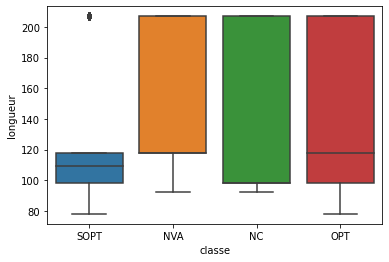

In [13]:
sns.boxplot(data=df, x="classe", y="longueur")

In [6]:
# des fonctions pour extraire les variables globales
def Extract_glob_feat(df, feat, longueur):
    nume = []
    nume.append(np.array([1 for i in df[feat].values if i>0.3]).sum()/longueur)
    nume.append(np.array([1 for i in df[feat].values if i>0.5]).sum()/longueur)
    nume.append(np.array([1 for i in df[feat].values if i>0.7]).sum()/longueur)
    nume.append(np.array([1 for i in df[feat].values if i>0.9]).sum()/longueur)
    df_res = pd.DataFrame(data = [[df[feat].mean(), df[feat].median(), nume[0], nume[1], nume[2], nume[3]]] , columns = [feat+"_mean", feat+"_median", feat+"_"+str(0.3), feat+"_"+str(0.5), feat+"_"+str(0.7), feat+"_"+str(0.9)])
    return df_res
    
def extract_all_var(df, variables, longueur):
    list_df = []
    for feat in variables:
        df_t = Extract_glob_feat(df, feat, longueur)
        list_df.append(df_t)
    df_tot = pd.concat(list_df, axis = 1)
    return df_tot

var_percent = ['gc_percent', 'cov20_percent', 'cov100_percent', 'cov500_percent', 'fwd_e2e_percent', 'rev_e2e_percent']

ordr = list(dict.fromkeys(df["ordre"].values))
resultat = []


for i in ordr:
    df_tru = df[df["ordre"]==i]
    longueur = df_tru["longueur"].values[0]
# information des variables en pourcent
    df_var = extract_all_var(df_tru, var_percent, longueur)


# information sur la classe
    df_var.loc[:,"ordre"] = i
    df_var.loc[:, "type"] = df_tru["type"].values[0]
    df_var.loc[:, "date"] = df_tru["date"].values[0]
    df_var.loc[:, "classe"] = df_tru["classe"].values[0]
    df_var.loc[:, "num2"] = df_tru["num2"].values[0]
    df_var.loc[:, "longueur"] = longueur

# varible globale % de OPT
    OPT = np.array([1 for i in range(len(df_tru)) if df_tru["pred"].values[i]=="OPT"]).sum()
    OPT_percent = OPT/longueur

    df_var.loc[:, "OPT_percent"] = OPT_percent

# création de la base de données / CSV
    resultat.append(df_var)
df_resul = pd.concat(resultat)
df_resul.index = range(len(df_resul))

In [7]:
df_resul

,gc_percent_mean,gc_percent_median,gc_percent_0.3,gc_percent_0.5,gc_percent_0.7,gc_percent_0.9,cov20_percent_mean,cov20_percent_median,cov20_percent_0.3,cov20_percent_0.5,...,rev_e2e_percent_0.5,rev_e2e_percent_0.7,rev_e2e_percent_0.9,ordre,type,date,classe,num2,longueur,OPT_percent
0,0.498640,0.483315,0.956522,0.445652,0.043478,0.0,1.0,1.0,1.0,1.0,...,0.989130,0.934783,0.869565,64,CVC,19-03-19,SOPT,42,92,0.445652
1,0.517229,0.491446,0.989796,0.489796,0.091837,0.0,1.0,1.0,1.0,1.0,...,0.979592,0.979592,0.918367,345,CVC,28-02-20,NVA,63,98,0.959184
2,0.488742,0.471689,0.966102,0.389831,0.033898,0.0,1.0,1.0,1.0,1.0,...,1.000000,0.974576,0.957627,526,CVC,06-07-21,NC,22,118,0.381356
3,0.517229,0.491446,0.989796,0.489796,0.091837,0.0,1.0,1.0,1.0,1.0,...,0.989796,0.989796,0.938776,278,CVC,07-01-20,OPT,6,98,0.979592
4,0.431896,0.409219,0.846154,0.282051,0.038462,0.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,322,CVC,25-02-20,OPT,42,78,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.462737,0.471074,0.889908,0.394495,0.027523,0.0,1.0,1.0,1.0,1.0,...,0.972477,0.972477,0.880734,263,BM,14-07-20,NC,33,109,0.256881
418,0.488742,0.471689,0.966102,0.389831,0.033898,0.0,1.0,1.0,1.0,1.0,...,0.991525,0.983051,0.932203,268,BM,19-05-20,OPT,33,118,0.991525
419,0.479645,0.465116,0.937198,0.415459,0.038647,0.0,1.0,1.0,1.0,1.0,...,0.980676,0.980676,0.932367,264,BM,14-07-20,NVA,46,207,0.980676
420,0.462737,0.471074,0.889908,0.394495,0.027523,0.0,1.0,1.0,1.0,1.0,...,0.972477,0.963303,0.917431,267,BM,14-07-20,OPT,69,109,1.000000


In [8]:
# df_resul.to_csv("Database_Global_Amplicon+DT.csv")

In [2]:
# path = r"C:\Users\ahmed\MFE project"
# df = pd.read_csv(os.path.join(path, [i for i in os.listdir(path) if i.find("Database_Global_Amplicon+RF.csv")>-1][0]))